In [1]:
import numpy as np
import os
import xarray as xr
from matplotlib import pyplot as plt
from scipy.interpolate import interp2d

In [2]:
#### SWOT DATA
# Make sure to put this script in the directory below (/data/OSMOSIS/) before you run it

domain_name = 'OSMOSIS1'
addpath = '/home/hafolahbi/Desktop/INTERN/Work/SWOT_prac/data'
os.chdir(r'/home/hafolahbi/Desktop/INTERN/Work/SWOT_prac/data/OSMOSIS')

# Name of the SWOT pass in data/*domain*/ directory
if domain_name == 'OSMOSIS1' :
    path_SWOTpass = 'BOOST-SWOT_SWOT_OSMOSIS_c02_p436.nc'
    path_nadir = 'BOOST-SWOT_J1_nadir_c05_p01.nc'
    # Plotting params
    max_range = 0.2 # Limit for colorbar (SSH in meters) for SSH
    max_range_diff = 0.1 # Limit for colorbar (SSH in meters) for SSH differences

In [3]:
#pwd
path_SWOTpass

'BOOST-SWOT_SWOT_OSMOSIS_c02_p436.nc'

In [4]:
#### Download a SWOT path

roll_error_only = True

all_but_karin = False

with xr.open_dataset(path_SWOTpass, mask_and_scale=True) as (ds_SWOTpass):
    ntime = ds_SWOTpass.time.size
#ds_SWOTpass.info() # Dimension of the dataset
nc = ds_SWOTpass.nC.size
lon_swotpass = np.zeros([ntime, nc])
lon_swotpass [:,:] = ds_SWOTpass.lon
#lon_swotpass = np.ma.masked_invalid(lon_swotpass)
lat_swotpass = np.zeros([ntime,nc])
lat_swotpass [:,:] = ds_SWOTpass.lat
#lat_swotpass = np.ma.masked_invalid(lat_swotpass)
ssh_swotpass = np.zeros([ntime,nc])
if roll_error_only:
    ssh_swotpass[:, :] = ds_SWOTpass.ssh_model + ds_SWOTpass.roll_err
elif all_but_karin:
   ssh_swotpass[:, :] = ds_SWOTpass.ssh_model + ds_SWOTpass.roll_err + ds_SWOTpass.phase_err + ds_SWOTpass.timing_err + ds_SWOTpass.bd_err
else: 
    ssh_swotpass[:, :] = ds_SWOTpass.ssh_obs
#ssh_swotpass = np.ma.masked_invalid(ssh_swotpass)
ssh_swotpass_truth = np.zeros([ntime, nc]) 
ssh_swotpass_truth[:, :] = ds_SWOTpass.ssh_model # ssh model
#ssh_swotpass_truth = np.ma.masked_invalid(ssh_swotpass_truth)

In [5]:
#### Download NADIR path
with xr.open_dataset(path_nadir, mask_and_scale=True) as ds_nadirpass:
    ndtime = ds_nadirpass.time.size
lon_nadirpass = np.zeros([ndtime])
lon_nadirpass[:] = ds_nadirpass.lon
lat_nadirpass = np.zeros([ndtime])
lat_nadirpass[:] = ds_nadirpass.lat
x_al = np.zeros([ndtime])
x_al[:] = ds_nadirpass.x_al
ssh_nadir = np.zeros([ndtime])  
            
ssh_nadir[:] = ds_nadirpass.ssh_obs
ssh_nadir_truth = np.zeros([ndtime])  
ssh_nadir_truth[:] = ds_nadirpass.ssh_model

(49, 51.25)

<Figure size 432x288 with 0 Axes>

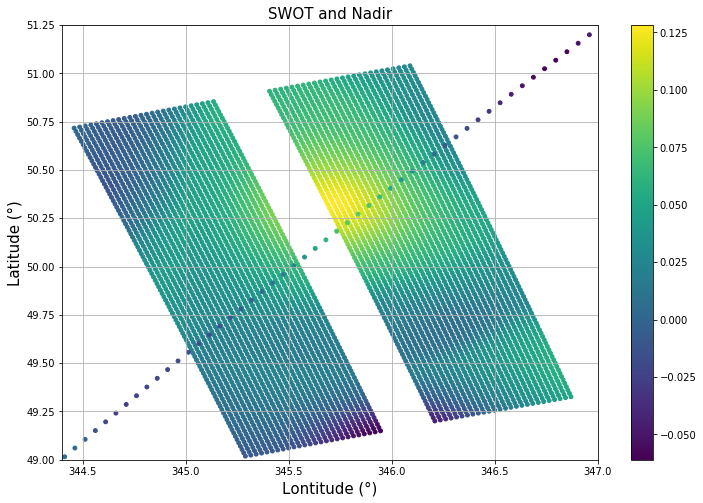

In [6]:
plt.figure(1)
plt.figure(figsize=(12,8)) 
plt.scatter(lon_swotpass[250:350], lat_swotpass[250:350],c=ssh_swotpass_truth[250:350],s=15)
plt.scatter(lon_nadirpass,lat_nadirpass,c=ssh_nadir_truth,s=15)
plt.ylabel('Latitude (°)',fontsize=15)
plt.xlabel('Lontitude (°)',fontsize=15)
plt.title('SWOT and Nadir',fontsize=15)
plt.colorbar()
plt.grid()
#plt.grid(which='both', linestyle='-', linewidth='1.0', color='red')
ax = plt.gca()
#print(ax)
ax.set_xlim([344.4,347])
ax.set_ylim([49,51.25])

In [7]:
# Not used due to error obtained
#plt.figure(2)
#plt.figure(figsize=(12,8)) 
#plt.scatter(lon_swotpass[270:330], lat_swotpass[270:330],c=ssh_swotpass_truth[270:330],s=15)
#plt.scatter(lon_nadirpass,lat_nadirpass,c=ssh_nadir_truth,s=15)
#plt.ylabel('Latitude (°)',fontsize=15)
#plt.xlabel('Lontitude (°)',fontsize=15)
#plt.title('SWOT and Nadir',fontsize=15)
#plt.colorbar()
#plt.grid()
#ax = plt.gca()
#print(ax)
#ax.set_xlim([344.5,346.8])
#ax.set_ylim([49.25,51])

#lon = lon_swotpass[270:330]
#lat = lat_swotpass[270:330]
#ssh = ssh_swotpass[270:330]
#lon.shape
# Obtained the same error (nan for all values of SWOT interpolated on nadir line)...when using 
# the above array (figure shown above) for the interpolation function

In [8]:
lon = lon_swotpass[250:350] # Selected region to be interpolated
lat = lat_swotpass[250:350]
ssh = ssh_swotpass[250:350]

swot_on_nadir = interp2d(lon,lat,ssh)

/home/hafolahbi/anaconda3/lib/python3.7/site-packages/scipy/interpolate/_fitpack_impl.py:976: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=64,86 m=5200 fp=0.001106 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


In [9]:
# Corresponding lon and lat of nadir that cross path with SWOT
lon_nadir = lon_nadirpass[95:125] 
lat_nadir = lat_nadirpass[95:125]

In [10]:
swot_on_nadir1 = swot_on_nadir(lon_nadir,lat_nadir) # Applying the interpolation function on selected nadir path
swot_on_nadir1 = np.diag(swot_on_nadir1)
print(swot_on_nadir1)

[ 0.          0.          0.          0.01712241  0.02185549  0.01182755
  0.01117293  0.0134438   0.01487128  0.02129345  0.01894253  0.02485094
  0.03033103  0.03614053  0.04116245  0.          0.00152399  0.05752569
  0.06932202  0.06827221  0.05775773  0.04201798  0.02505285  0.00971452
 -0.00614825 -0.02099341 -0.03551101 -0.05621606  0.          0.        ]


In [11]:
# Minimum and maximum values of interpolated ssh 
np.min(swot_on_nadir1),np.max(swot_on_nadir1)

(-0.05621605747562459, 0.06932202015475832)

In [12]:
# To select the ssh observation of the nadir ssh for the selected region where interpolation was done  
ssh_nadir1 = ssh_nadir[95:125]
print(np.min(ssh_nadir1),np.max(ssh_nadir1)) # Minimum and maximum values of nadir ssh of selected region
x_al1 = x_al[95:125]
x_al1 = x_al1/1000 # Across track distance in km

-0.0159 0.1091


In [13]:
# np.min(ssh_nadir),np.max(ssh_nadir) # Minimum and maximum value of nadir ssh

Text(0.5, 1.0, 'SSH of SWOT path and Nadir')

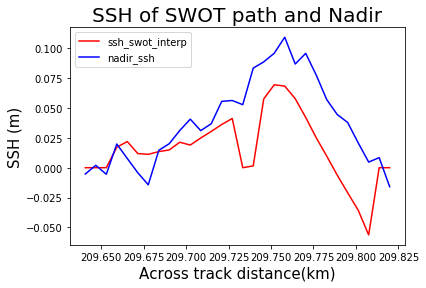

In [14]:
plt.figure()
plt.plot(x_al1,swot_on_nadir1,color='red',label='ssh_swot_interp')
# swot_on_nadir is the SWOT data that will appear to be seen by the nadir altimeter
plt.plot(x_al1,ssh_nadir1,color='blue',label='nadir_ssh')
plt.legend()
plt.ylabel('SSH (m)',fontsize=15)
plt.xlabel('Across track distance(km)',fontsize=15)
plt.title('SSH of SWOT path and Nadir',fontsize=20)

In [15]:
# Difference (C(h) as used in the Latex document) between the ssh (swot_on_nadir) and the ssh nadir
Difference = swot_on_nadir1-ssh_nadir1
print(np.min(x_al), np.max(x_al))
Difference

209052.953125 210091.71875


array([ 0.0053    , -0.002     ,  0.0055    , -0.00267759,  0.01415549,
        0.01602755,  0.02547293, -0.0010562 , -0.00522872, -0.00980655,
       -0.02165747, -0.00614906, -0.00646897, -0.01935947, -0.01503755,
       -0.0527    , -0.08177601, -0.03097431, -0.02637798, -0.04082779,
       -0.02894227, -0.05358202, -0.05244715, -0.04728548, -0.05064825,
       -0.05879341, -0.05631101, -0.06091606, -0.0084    ,  0.0159    ])